# ATTRITION ANALYSIS_Group#2

In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [4]:
# Read CSV
attrition_df = pd.read_csv("Raw_Datafiles/HR-Employee-Attrition.csv")
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition_df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1291,37,Yes,Travel_Rarely,370,Research & Development,10,4,Medical,1,1809,...,2,80,0,10,4,1,10,3,0,8
910,23,No,Travel_Rarely,373,Research & Development,1,2,Life Sciences,1,1270,...,4,80,1,1,2,3,1,0,0,1
345,23,No,Travel_Rarely,1309,Research & Development,26,1,Life Sciences,1,465,...,3,80,2,4,2,2,4,2,0,2
1412,30,No,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,...,3,80,0,12,6,2,12,8,1,7
171,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,1,235,...,1,80,0,1,5,4,0,0,0,0


In [6]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Describe the data
attrition_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
# type
attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
# Summarize the Data
employee_count = len(attrition_df)
attrition_rate = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["Attrition"].count() / employee_count
gender_ratio_m = attrition_df.loc[attrition_df["Gender"] == "Male"]["Gender"].count() / employee_count
gender_ratio_f = attrition_df.loc[attrition_df["Gender"] == "Female"]["Gender"].count() / employee_count
avgyearswco = attrition_df["YearsAtCompany"].mean()
avgsatisfaction = attrition_df["JobSatisfaction"].mean()


summary_df = pd.DataFrame([{"Employee Count":employee_count,
                            "Attrition Rate":attrition_rate,
                            "Gender Ratio (Male)": gender_ratio_m,
                            "Gender Ratio (Female)": gender_ratio_f,
                            "Avg Years at Company": avgyearswco,
                            "Avg Job Satisfaction (out of 5)": avgsatisfaction
                           }])
summary_df

,Employee Count,Attrition Rate,Gender Ratio (Male),Gender Ratio (Female),Avg Years at Company,Avg Job Satisfaction (out of 5)
0,1470,0.161224,0.6,0.4,7.008163,2.728571


## Distribution of employee attrition in the company  

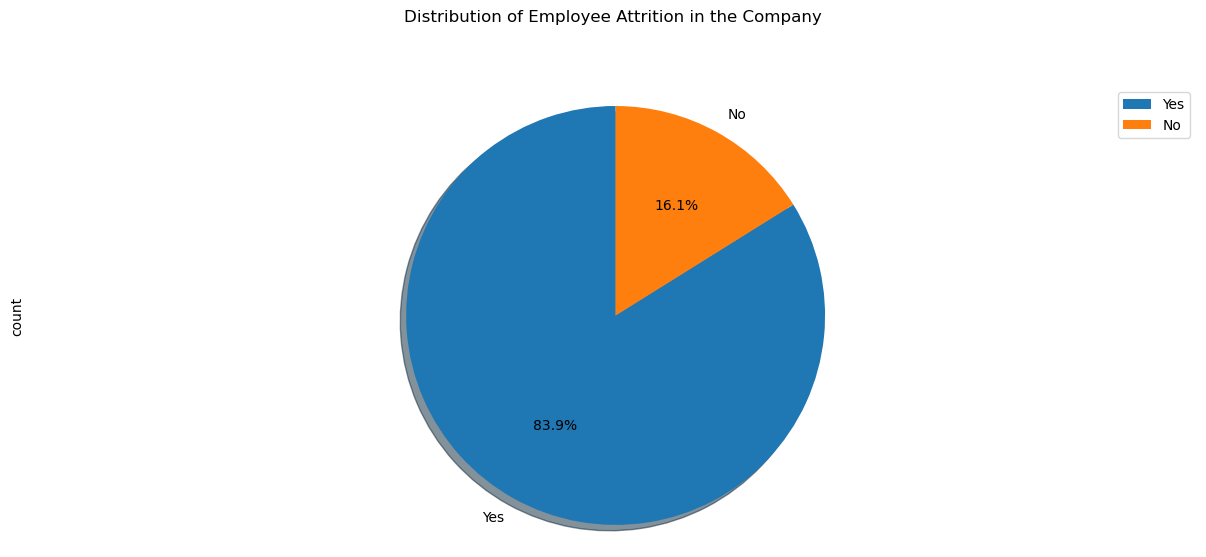

In [10]:
# Pie chart analysis to see the distribution of employee attrition in the company
attrition_df['Attrition'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=attrition_df["Attrition"].unique()                          
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=attrition_df["Attrition"].unique(), loc='upper right') 
plt.savefig("images/dist_pie.png")
# show plot
plt.show()

 ####  According the Pie Chart, we can say that out of 1470 employees, 16.1% of the employees left their job; while  the other 83.9% of the employees preferred to stay at their jobs

## Analysis by Gender

In [11]:
# Sex ratio of employee attrition in the company
gender_df = pd.DataFrame([{
    "Male":attrition_df.loc[attrition_df["Gender"] == "Male"]["Gender"].count(),
    "Female":attrition_df.loc[attrition_df["Gender"] == "Female"]["Gender"].count()
}])

gender_df.head()

,Male,Female
0,882,588


In [12]:
attrition_df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

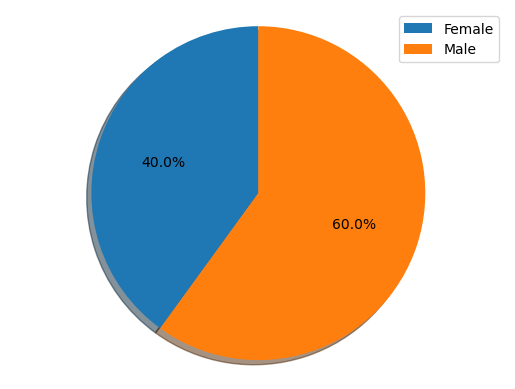

In [13]:
# Pie chart analysis to see check sex ratio of employees in the company

plt.pie(attrition_df.groupby('Gender')['Gender'].count(), 
        autopct="%1.1f%%", shadow=True, startangle=90)
  
plt.axis('equal') 
plt.legend(labels=attrition_df['Gender'].unique(), loc='upper right') 
plt.savefig("images/gender_pie.png")
plt.show()

#### This Pie chart divides the total employees into groups of male and female, we can see that the attrition rate based on sex ratio is 60% & 40% for male & female respectively

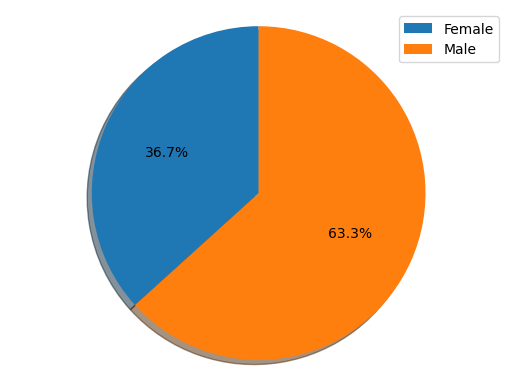

In [14]:
# Gender ratio of people who leave the company

plt.pie(attrition_df.loc[attrition_df["Attrition"]=="Yes"].groupby('Gender')['Gender'].count(), 
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis('equal') 
plt.legend(labels=attrition_df['Gender'].unique(), loc='upper right') 
plt.savefig("images/gender_pie_attri.png")
plt.show()

#### This Pie chart depicts that employees who left, their sex ratio is 63.3% & 36.7% for male & female respectively

In [17]:
# check the attrition number based on gender
fem_male = attrition_df.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fem_male = fem_male.transpose()
fem_male

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


## Analysis by Maritial Status

In [18]:
# check the attrition rate based on marital status
ms = attrition_df[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [19]:
ms['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

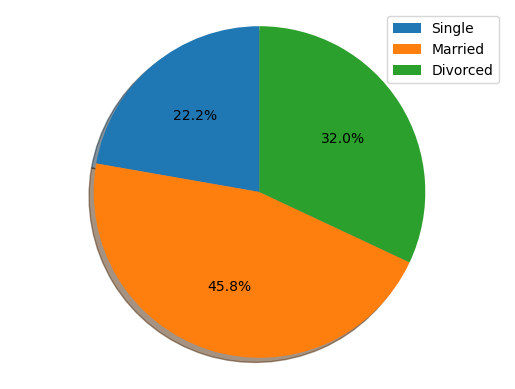

In [20]:
# Pie chart analysis to check the maritial status of the employees
plt.pie(attrition_df.groupby('MaritalStatus')['MaritalStatus'].count(), 
        autopct="%1.1f%%", shadow=True, startangle=90)  
plt.axis('equal') 
# add legend
plt.legend(labels=attrition_df["MaritalStatus"].unique(),loc='upper right') 

plt.savefig("images/marital_pie.png")

#### From the above pie chart we can see the Maritial status distribution of employees 

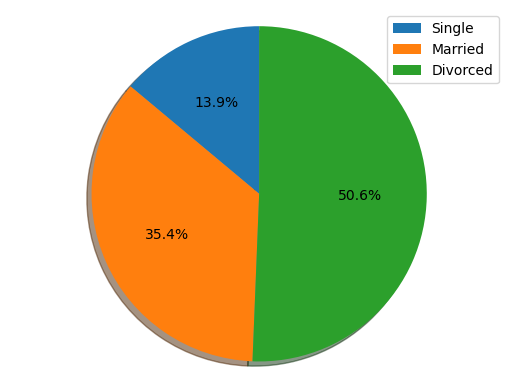

In [21]:
# Pie chart analysis to check of employee attrition based on their maritial status

plt.pie(attrition_df.loc[attrition_df["Attrition"] == "Yes"].groupby('MaritalStatus')['MaritalStatus'].count(), 
        autopct="%1.1f%%", shadow=True, startangle=90)    
plt.axis('equal') 
# add legend
plt.legend(labels=attrition_df["MaritalStatus"].unique(),loc='upper right') 
plt.savefig("images/gender_pie_attr.png")

#### Single employees have the highest rate of attrition in the Marital Status category. At the end of the spectrum, a divorced employee will most likely stay at a job. The pie chart also points out, the Married employee will also likely engage in attrition more than a divorced employee but less frequently than the Single employee. From the above pie chart we can see the attrition rate based on Maritial status of employees, 50% of divorced employees are more likely to leave as against 13.9% married employees & 35.4% of single employees contribute to the attrition

## Analysis by Age

In [22]:
# Bin Age
bins = [0,25,35,45,55,99]
group_names = ["18-25","25-35","35-45","45-55","55+"]

In [23]:
# create a binned_df to keep the raw data untouched
binned_df = attrition_df.copy()
binned_df["Attrition Rate"] = ""
for index, row in binned_df.iterrows():
    if row["Attrition"] == "Yes":
        binned_df.loc[index,"Attrition Rate"] = 1
    else:
        binned_df.loc[index,"Attrition Rate"] = 0

# Bin by age
binned_df["Age Bins"] = pd.cut(attrition_df["Age"],
                                bins,labels = group_names,
                                include_lowest = True)

# Identify which columns we wanna group by
jobsat = binned_df.groupby("Age Bins")["JobSatisfaction"].mean()
attritionrate = binned_df.groupby("Age Bins")["Attrition Rate"].mean()

# create an age_bin summary
age_bin_summary = pd.DataFrame({
    "Job Satisfaction":jobsat,
    "Attrition Rate": attritionrate
})
age_bin_summary

,Job Satisfaction,Attrition Rate
Age Bins,,
18-25,2.731707,0.357724
25-35,2.739274,0.191419
35-45,2.730769,0.09188
45-55,2.703540,0.115044
55+,2.680851,0.170213


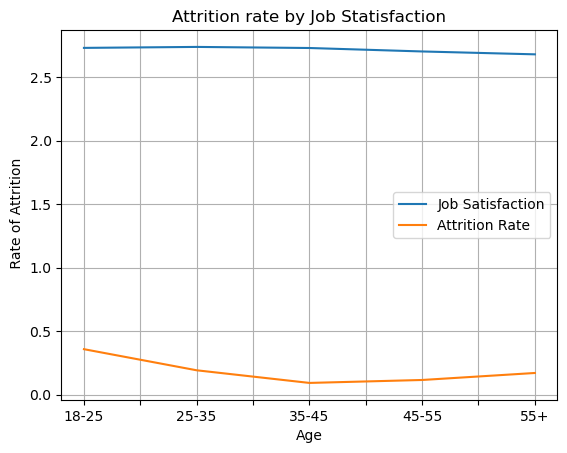

In [24]:
# create a 2 LINE GRAPH to check the attrition rate & job satisfaction vs age of employees
graph = age_bin_summary
graph.plot(kind="line",grid=True, title="Attrition rate by Job Statisfaction", ylabel=" Rate of Attrition", xlabel="Age")
plt.savefig("images/job_satis_line.png")

#### This graph of Attrition by Job Satisfaction mainly visualizes that the employee attrition rate stabilizes between ages 36 to 45. It also depicts employees’ who are 18 through 45 years old tend to answer job satisfaction questions. The line for this age group lingers around 2.73 to 2.74. Its not until age 45 and over does job satisfaction rate show a lower trend. Conclusion, the Attrition rate is not supported by the Job Satisfaction survey questions. Job satisfaction survey questions do not assist when determining when an employee will leave your company.  This graph does however display that the age group 18-25 has the highest attrition rate in general.¶

In [25]:
#print age bin summary
age_bin_summary.reset_index(inplace=True)
print(age_bin_summary)

  Age Bins  Job Satisfaction Attrition Rate
0    18-25          2.731707       0.357724
1    25-35          2.739274       0.191419
2    35-45          2.730769        0.09188
3    45-55          2.703540       0.115044
4      55+          2.680851       0.170213


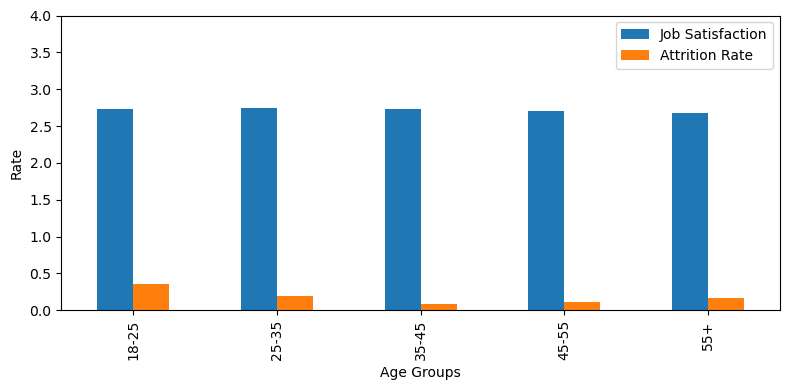

In [26]:
# plotting BAR CHART to see the raltionship of job satisfaction vs attrition rate

barchart1 = age_bin_summary.plot(kind="bar", figsize=(8,4), x="Age Bins", y=["Job Satisfaction","Attrition Rate"], ylim=(0,4),
                              xlabel = "Age Groups", ylabel="Rate")                       
plt.tight_layout()
# Show plot
plt.savefig("images/bargraph.png")
plt.show()  

#### This bar chart clearly shows that even though the employees respond to job satisfaction survey question positively, they still leave the job for various reasons

## Analysis by Monthly Income

In [27]:
# Box plot analysis to check of employee attrition based on the monthly income

# attrition "yes" calculation
monthly_i = attrition_df[attrition_df['Attrition']=='Yes']['MonthlyIncome']
monthly_i = monthly_i.reset_index()
monthly_i.drop(['index'], axis=1, inplace=True)

# attrition "no" calculation
m_no = attrition_df[attrition_df['Attrition']=='No']['MonthlyIncome']
m_no = m_no.reset_index()
m_no.drop(['index'], axis=1, inplace=True)

# attrition "yes" & "no" DF
monthly_i['m_no'] = m_no
monthly_i.rename(columns={'MonthlyIncome':'Yes', 'm_no':'No'}, inplace=True)
# display results
monthly_i.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


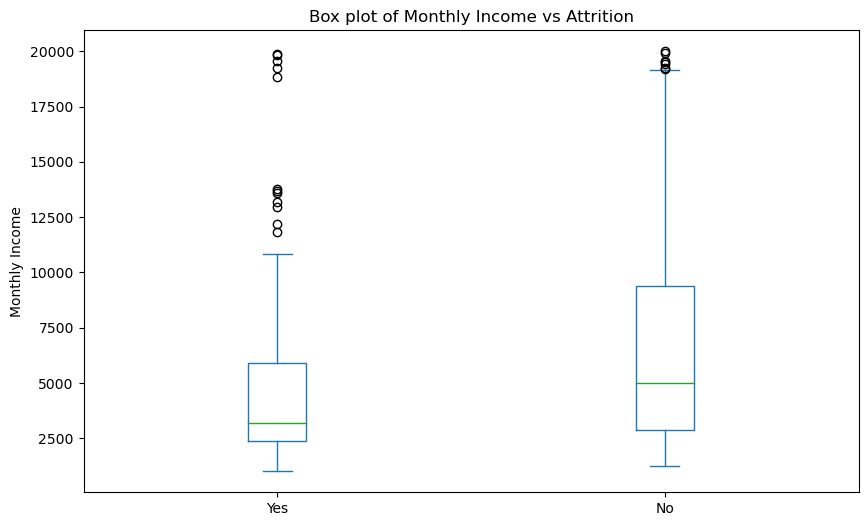

In [28]:
# plotting box plot to check of employee attrition based on the monthly income
monthly_i.plot(kind='box', figsize=(10, 6))
# labels
plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')
# show plot
plt.savefig("images/box_whisker_plot.png")
plt.show()

 ####   Employees who left their jobs tend to have low average monthly income as against to those who stayed. 

## Analysis by performance rating

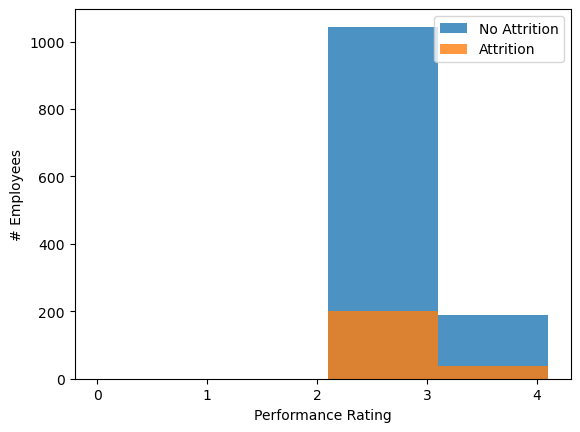

In [29]:
# Performance Rating vs Attrition
bins = [0,1.1,2.1,3.1,4.1]
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["PerformanceRating"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["PerformanceRating"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')
plt.xlabel("Performance Rating")
plt.ylabel("# Employees")
plt.savefig("images/hist1.png")
plt.show()

#### It is important to note that the lowest performance rating that could be given was 2 hence the reason there are no employees with a 0 or 1 performance rating.
#### Employees with a performance rating of 2-3 tend to leave although the total amount of employees with this rating is about 4x higher than employees with a job rating of 3-4


## Analysis by work-life balance

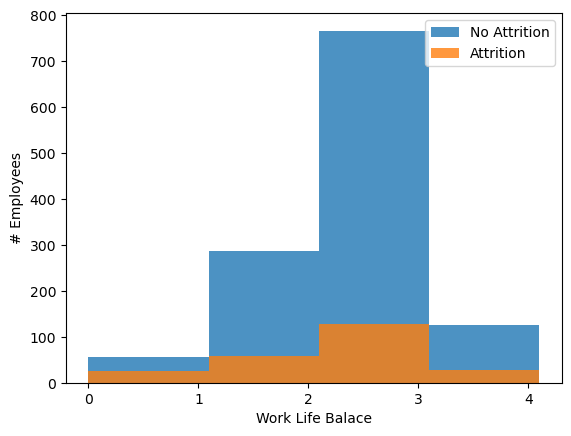

In [30]:
# Work-Life vs Attrition
bins = [0,1.1,2.1,3.1,4.1]
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["WorkLifeBalance"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["WorkLifeBalance"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')
plt.xlabel("Work Life Balace")
plt.ylabel("# Employees")
plt.savefig("images/hist2.png")
plt.show()

#### Based on the answers given by the employees for work life balance, there is not a noticeable amount of attrition that can be tied to this factor.


## Analysis of Work Experience

In [31]:
work_exp = attrition_df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
work_exp.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


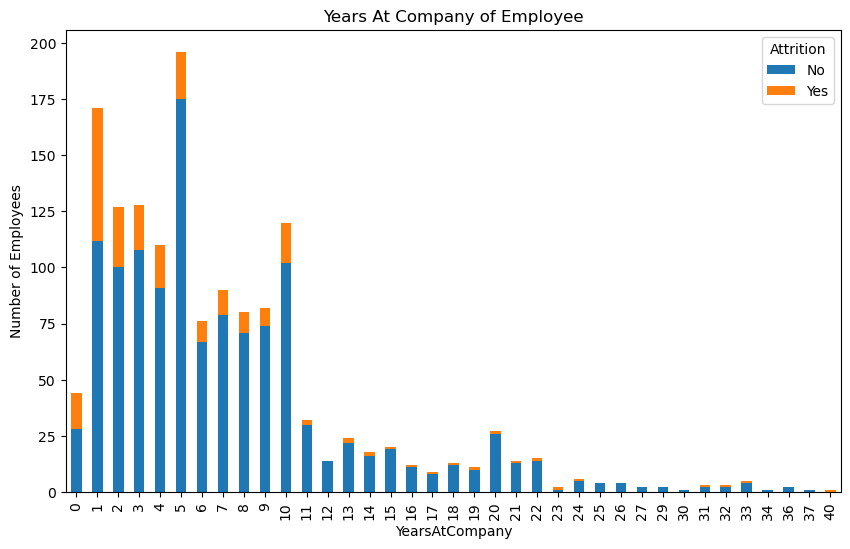

In [32]:
total_years = attrition_df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

total_years.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.savefig("images/bargraph2.png")
plt.show()

#### According to this bar chart it is clear that most of newly employees quit ther jobs without having time to start (between 1 to 5 years ) . The company needs to pay attention the new people who just got the job. Most employees leave the job within 1st year of employment, as against attrition stabilizes after 10 years of employment.¶

## Analysis by frequency of business travel feature

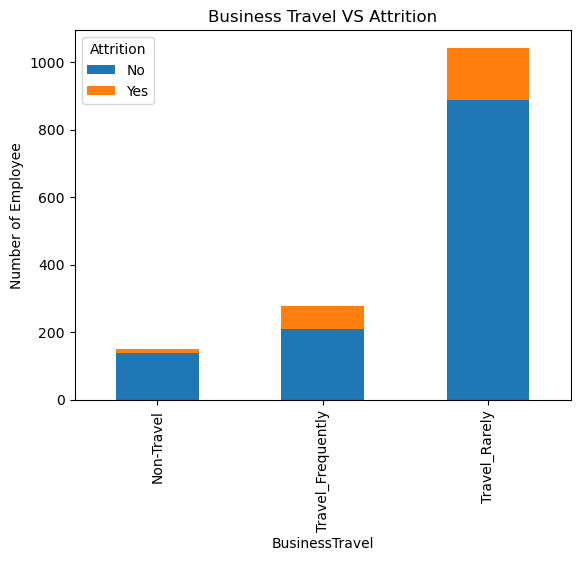

In [33]:
# Bussiness Travelling vs Attrition BAR CHART

Travel_vs_Attr =attrition_df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()
Travel_vs_Attr.plot(kind='bar', alpha=1, stacked='False')

# Add legends
plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
# show plot
plt.savefig("images/bargraph3.png")
plt.show()

#### This bar chart shows that business travel effects attrition for employees who travel rarely. The company can provide more opportunity for travel to retain employees.

## Analysis by Department

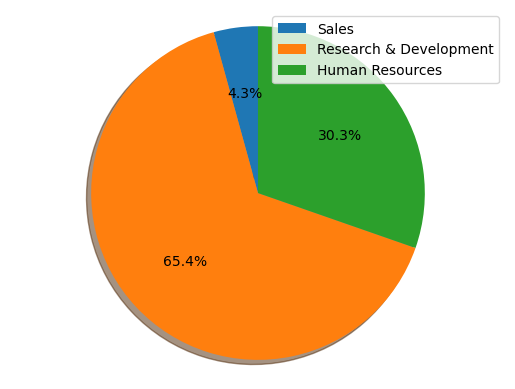

In [34]:
# employees by department
plt.pie(attrition_df.groupby('Department')['Department'].count(), 
        autopct="%1.1f%%", shadow=True, startangle=90)  
plt.axis('equal') 
# add legend
plt.legend(labels=attrition_df["Department"].unique(),loc='upper right')
plt.savefig("images/pie_department.png")

In [35]:
attrition_df.groupby("Department")["Department"].count()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64

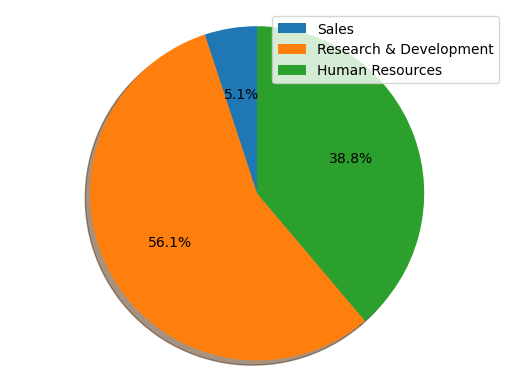

In [36]:
# PIE CHART - attrition by department
plt.pie(attrition_df.loc[attrition_df["Attrition"] =="Yes"].groupby('Department')['Department'].count(), 
        autopct="%1.1f%%", shadow=True, startangle=90)  
plt.axis('equal') 
# add legend
plt.legend(labels=attrition_df["Department"].unique(),loc='upper right')
plt.savefig("images/pie_department2.png")

#### From the above pie chart we see the Research & Development department has the highest attrition followed by Sales and finally the least attrition is for Human Resources

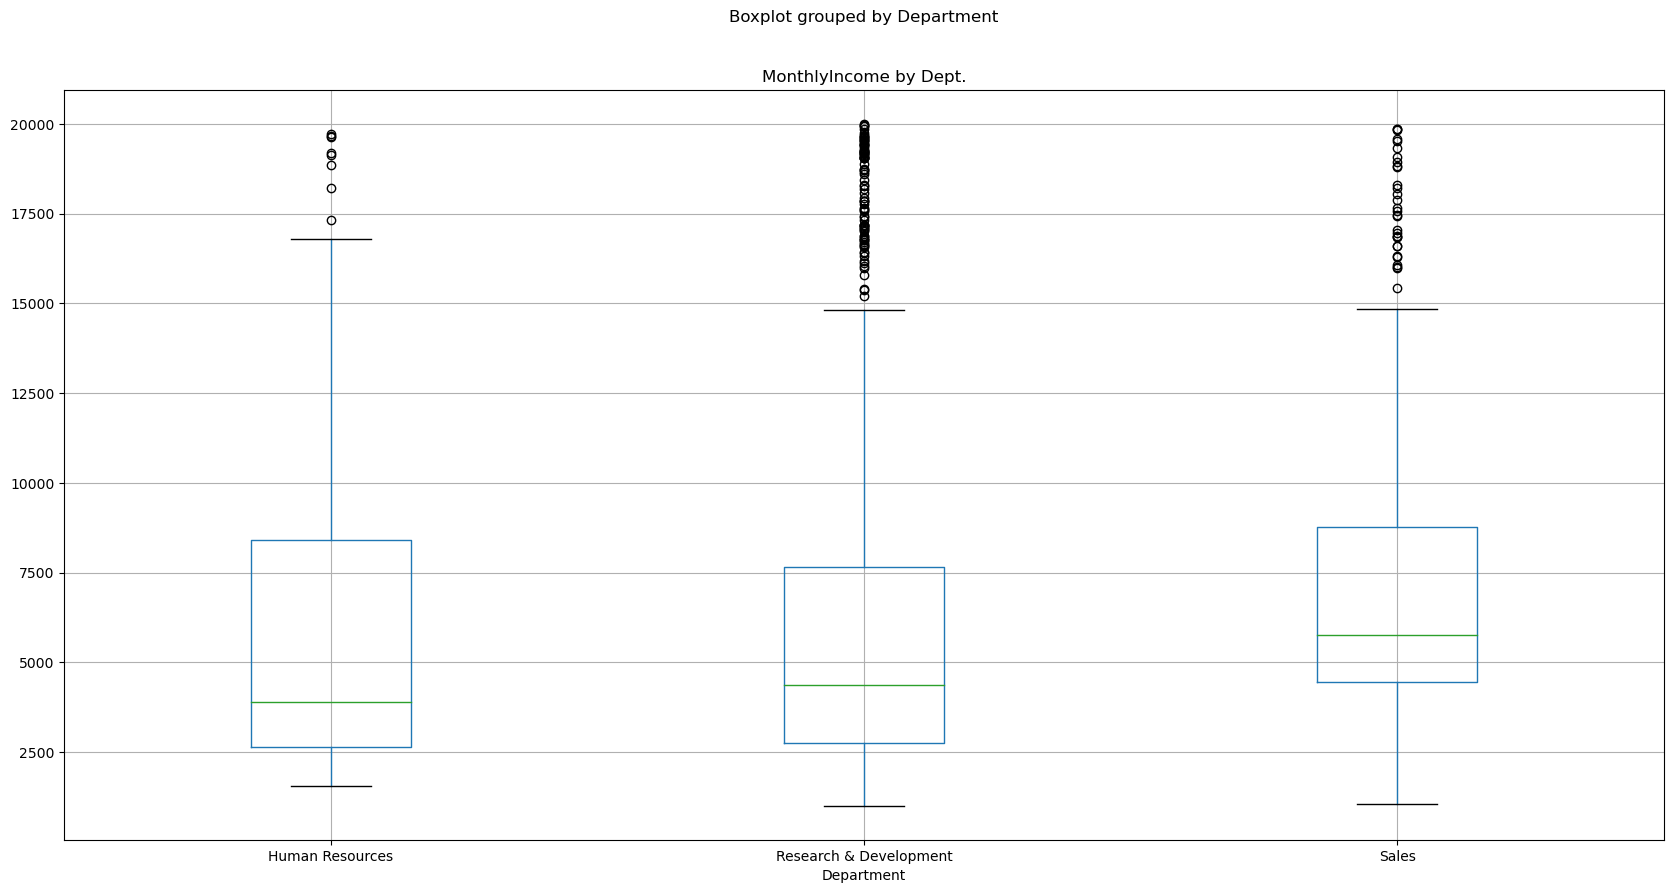

In [39]:
# BOX PLOT to find out other factors that could be affectiong the attrition by departments
# For example: we are checking the irregularity in monthly income by department

ax1 = attrition_df.boxplot("MonthlyIncome", by="Department",figsize=(20, 10))
ax1.set_title('MonthlyIncome by Dept.')
plt.savefig("images/box_whisker_bydepart.png")

#### Here we can see the Research & Development department has the most outliers in terms of monthly income as against Human resourses that has the least outliers
#### Research & developement is also the dept. with highest attrition while human resources the least attrition, it can be concluded that irregularity in pay scales within the dept. is contributing to the high attrition
#### solution could be to equalize pay scales of employees within the dept.

In [40]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Income = attrition_df["MonthlyIncome"]
quartiles = Income.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Monthly Income is: {lowerq}")
print(f"The upper quartile of Monthly Income is: {upperq}")
print(f"The interquartile range of Monthly Income is: {iqr}")
print(f"The median of Monthly Income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Monthly Income is: 2911.0
The upper quartile of Monthly Income is: 8379.0
The interquartile range of Monthly Income is: 5468.0
The median of Monthly Income is: 4919.0 
Values below -5291.0 could be outliers.
Values above 16581.0 could be outliers.


In [41]:
outlier_income = attrition_df.loc[(attrition_df['MonthlyIncome'] < lower_bound) | (attrition_df['MonthlyIncome'] > upper_bound)]
outlier_income

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,4,80,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,4,80,0,23,0,3,22,15,15,8
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,...,4,80,1,29,2,2,27,3,13,8
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,...,4,80,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,...,3,80,1,29,2,2,1,0,0,0
1377,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,...,4,80,0,28,3,3,5,4,4,3
1401,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,1973,...,1,80,1,35,0,3,10,9,1,4
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,...,3,80,0,21,3,2,6,0,1,3


In [42]:
# With the potential outliers, what is the lowest and highest income?
print(f"The minimum median income of the potential outliers is {outlier_income['MonthlyIncome'].min()}")
print(f"The maximum median income of the potential outliers is {outlier_income['MonthlyIncome'].max()}")

The minimum median income of the potential outliers is 16595
The maximum median income of the potential outliers is 19999


## Analysis by over time vs monthly income

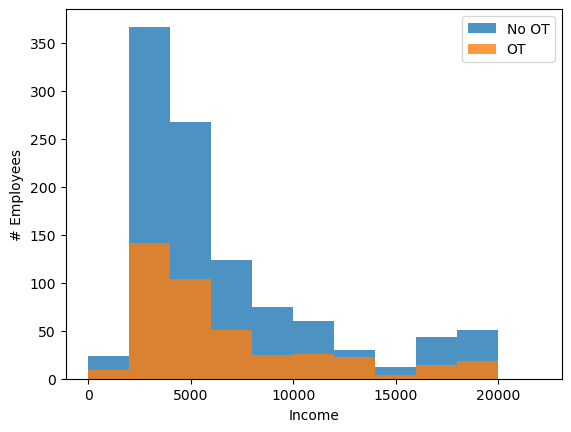

In [43]:
# BAR CHART for monthly Income vs OT
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]

plt.hist(attrition_df.loc[(attrition_df["OverTime"]=="No")]["MonthlyIncome"],bins,alpha=0.8,label="No OT")
plt.hist(attrition_df.loc[(attrition_df["OverTime"]=="Yes")]["MonthlyIncome"],bins,alpha=0.8,label="OT")
plt.legend(loc='upper right')
plt.xlabel("Income")
plt.ylabel("# Employees")
plt.savefig("images/histOT.png")
plt.show()

#### This histogram shows that employees that make less income tend to be the ones that work OT hours.

## Analysis by monthly income

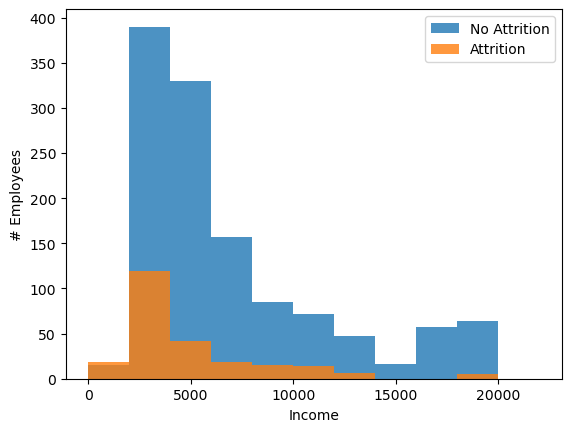

In [44]:
# Income vs Attrition
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["MonthlyIncome"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["MonthlyIncome"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')
plt.xlabel("Income")
plt.ylabel("# Employees")
plt.savefig("images/hist_income.png")
plt.show()

#### This histogram shows that most of the employees that are leaving are the ones that are making the least amount of money. 

## Analysis by age vs monthly income

The correlation between age and monthly income is 0.5


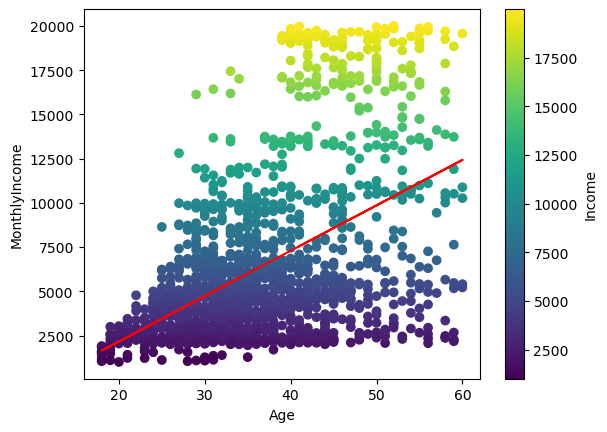

In [45]:
correlation = st.pearsonr(attrition_df["Age"],attrition_df["MonthlyIncome"])
print(f"The correlation between age and monthly income is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["Age"], attrition_df["MonthlyIncome"])
regress_values = attrition_df["Age"] * slope + intercept

plt.scatter(attrition_df['Age'], attrition_df['MonthlyIncome'], c=Income) 
clb = plt.colorbar() 
plt.plot(attrition_df["Age"],regress_values,"r-")
plt.xlabel("Age") 
plt.ylabel("MonthlyIncome") 
clb.set_label("Income") 
plt.savefig("images/heatmap.png")
plt.show()

#### The heatmap shows that older employees tend to be the ones that make higher income.  This is another instance where younger
#### employees are shown to have the lowest income.

## Analysis by commute time vs time at the company

The correlation between commute and time at the company is 0.01


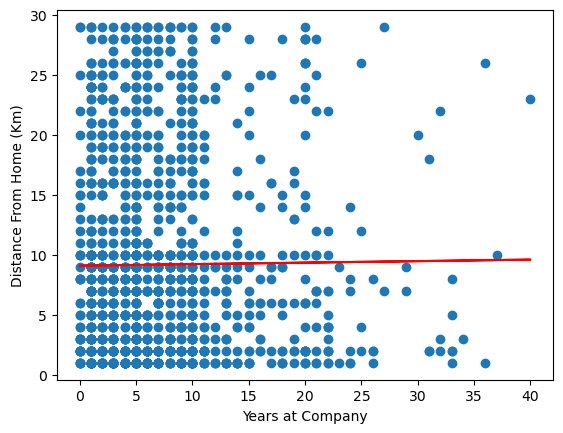

In [46]:
# Commute vs Time at the Company
# Correlation
correlation = st.pearsonr(attrition_df["YearsAtCompany"],attrition_df["DistanceFromHome"])
print(f"The correlation between commute and time at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["YearsAtCompany"], attrition_df["DistanceFromHome"])
regress_values = attrition_df["YearsAtCompany"] * slope + intercept

# Plot
plt.scatter(attrition_df["YearsAtCompany"],attrition_df["DistanceFromHome"])
plt.plot(attrition_df["YearsAtCompany"],regress_values,"r-")
plt.xlabel("Years at Company")
plt.ylabel("Distance From Home (Km)")
plt.savefig("images/scatter1.png")
plt.show()

#### It is clear that the commute to work is not a factor in employee attrition.

## Analysis by years since last promotion over years in the current role

The correlation between years in current role and years since last promotion is 0.55


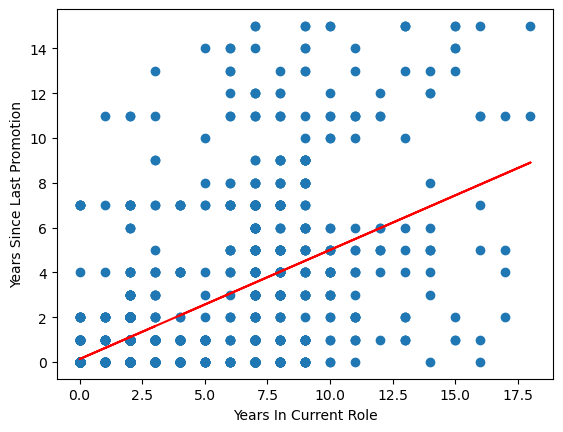

In [47]:
# Promotions over Time
# Correlation
correlation = st.pearsonr(attrition_df["YearsInCurrentRole"],attrition_df["YearsSinceLastPromotion"])
print(f"The correlation between years in current role and years since last promotion is {round(correlation[0],2)}")
# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["YearsInCurrentRole"], attrition_df["YearsSinceLastPromotion"])
regress_values = attrition_df["YearsInCurrentRole"] * slope + intercept
# Plot
plt.scatter(attrition_df["YearsInCurrentRole"],attrition_df["YearsSinceLastPromotion"])
plt.plot(attrition_df["YearsInCurrentRole"],regress_values,"r-")
plt.xlabel("Years In Current Role")
plt.ylabel("Years Since Last Promotion")
plt.savefig("images/scatter2.png")
plt.show()

#### Based on the correlation it appears that the longer an employee remains in their current role the longer they wait for a promotion.

The correlation between job satisfaction and year since last promotion at the company is -0.02


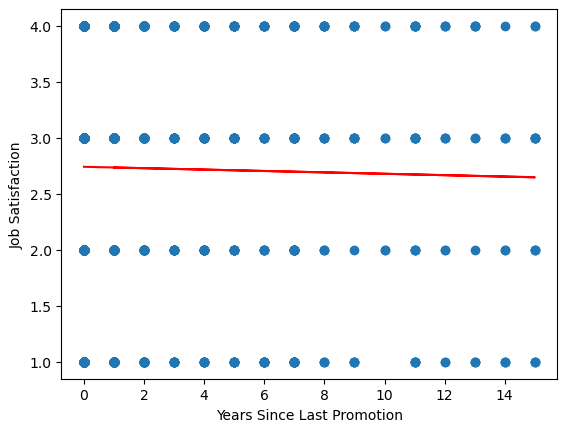

In [48]:
# overall
x = attrition_df["YearsSinceLastPromotion"]
y = attrition_df["JobSatisfaction"]


# Correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between job satisfaction and year since last promotion at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Job Satisfaction")
plt.savefig("images/scatter3.png")
plt.show()

The correlation between job satisfaction and year since last promotion at the company is 0.09


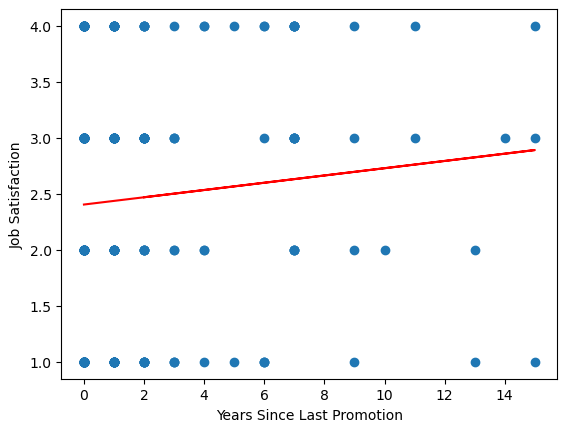

In [49]:
# for attrition = yes
x = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["YearsSinceLastPromotion"]
y = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["JobSatisfaction"]


# Correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between job satisfaction and year since last promotion at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Job Satisfaction")
plt.savefig("images/scatter3.png")
plt.show()

### Job Satisfaction vs Monthly Income

The correlation between job satisfaction and monthly income at the company is 0.34


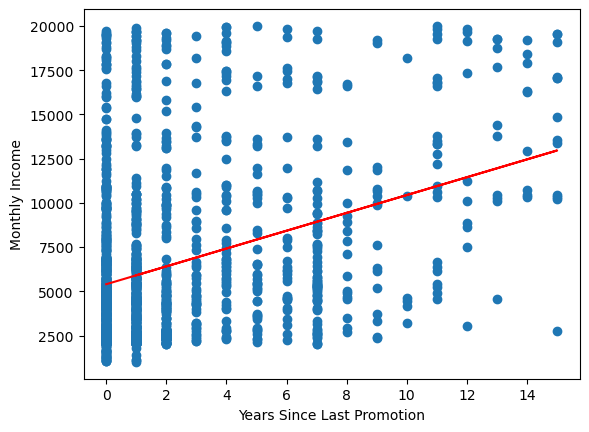

In [50]:
# overall
x = attrition_df["YearsSinceLastPromotion"]
y = attrition_df["MonthlyIncome"]


# Correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between job satisfaction and monthly income at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Monthly Income")
plt.savefig("images/scatter4.png")
plt.show()

The correlation between job satisfaction and monthly income at the company among people who leave is 0.0


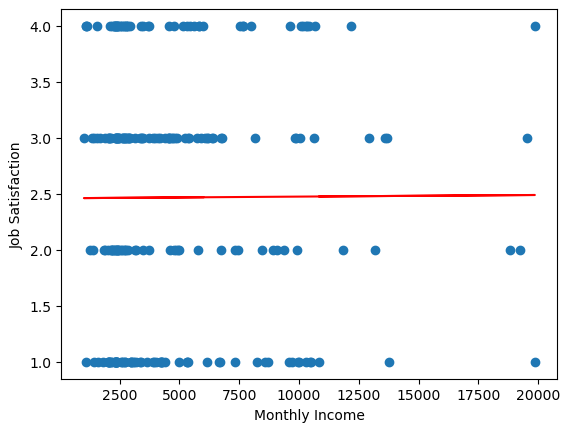

In [51]:
# for attrition = yes
x = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["MonthlyIncome"]
y = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["JobSatisfaction"]


# Correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between job satisfaction and monthly income at the company among people who leave is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Monthly Income")
plt.ylabel("Job Satisfaction")
plt.savefig("images/scatter4.png")
plt.show()

The correlation between TotalWorkingYears and JobLevel at the company is 0.78


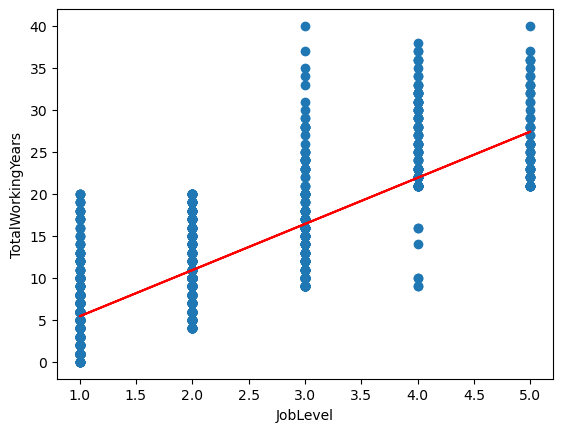

In [52]:
# overall
x = "JobLevel"
y = "TotalWorkingYears"


# Correlation
correlation = st.pearsonr(attrition_df[x],attrition_df[y])
print(f"The correlation between {y} and {x} at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df[x], attrition_df[y])
regress_values = attrition_df[x] * slope + intercept

# Plot
plt.scatter(attrition_df[x],attrition_df[y])
plt.plot(attrition_df[x],regress_values,"r-")
plt.xlabel(x)
plt.ylabel(y)
plt.savefig("images/scatter5.png")
plt.show()

The correlation between MonthlyIncome and TotalWorkingYears at the company is 0.77


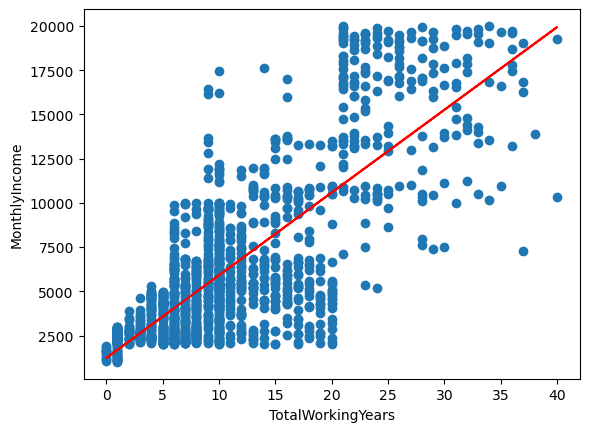

In [53]:
# overall
x = "TotalWorkingYears"
y = "MonthlyIncome"


# Correlation
correlation = st.pearsonr(attrition_df[x],attrition_df[y])
print(f"The correlation between {y} and {x} at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df[x], attrition_df[y])
regress_values = attrition_df[x] * slope + intercept

# Plot
plt.scatter(attrition_df[x],attrition_df[y])
plt.plot(attrition_df[x],regress_values,"r-")
plt.xlabel(x)
plt.ylabel(y)
plt.savefig("images/scatter6.png")
plt.show()

The correlation between MonthlyIncome and TotalWorkingYears at the company is 0.74


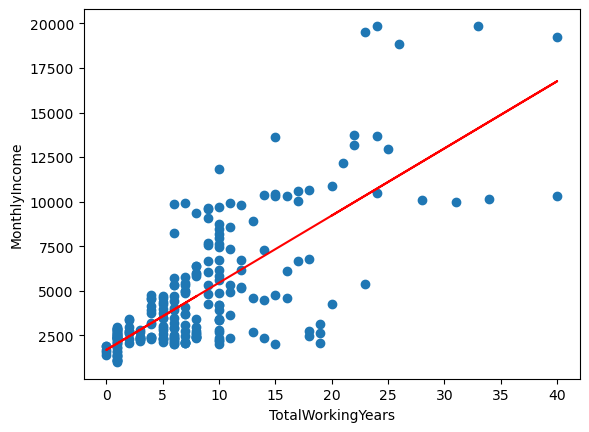

In [54]:
# for attrition=yes
x = "TotalWorkingYears"
y = "MonthlyIncome"


# Correlation
correlation = st.pearsonr(attrition_df.loc[attrition_df["Attrition"] == "Yes"][x],
                          attrition_df.loc[attrition_df["Attrition"] == "Yes"][y])
print(f"The correlation between {y} and {x} at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df.loc[attrition_df["Attrition"] == "Yes"][x], 
                                                        attrition_df.loc[attrition_df["Attrition"] == "Yes"][y])
regress_values = attrition_df.loc[attrition_df["Attrition"] == "Yes"][x] * slope + intercept

# Plot
plt.scatter(attrition_df.loc[attrition_df["Attrition"] == "Yes"][x],
            attrition_df.loc[attrition_df["Attrition"] == "Yes"][y])
plt.plot(attrition_df.loc[attrition_df["Attrition"] == "Yes"][x],regress_values,"r-")
plt.xlabel(x)
plt.ylabel(y)
plt.savefig("images/scatter7.png")
plt.show()

#### The more years employees work, the more their income will increase overtime.

The correlation between PercentSalaryHike and PerformanceRating at the company is 0.77


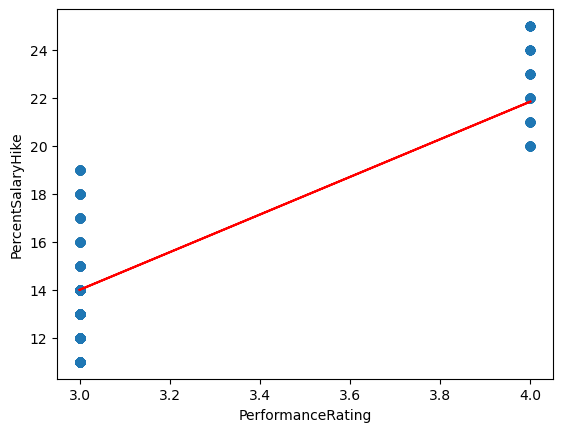

In [55]:
# overall
x = "PerformanceRating"
y = "PercentSalaryHike"


# Correlation
correlation = st.pearsonr(attrition_df[x],attrition_df[y])
print(f"The correlation between {y} and {x} at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df[x], attrition_df[y])
regress_values = attrition_df[x] * slope + intercept

# Plot
plt.scatter(attrition_df[x],attrition_df[y])
plt.plot(attrition_df[x],regress_values,"r-")
plt.xlabel(x)
plt.ylabel(y)
plt.savefig("images/scatter8.png")
plt.show()

#### We can infer that salary hikes are related to performance ratings.